# Problem Sheet 2

## 1. Michaelis-Menten model

In the notes, we studied the Michaelis-Menten model for enzyme reaction kinetics.  In doing so, we reduced the original system to the nondimensional system

\begin{align*}
\epsilon\frac{dv}{d\tau} &= u - (u + K)v,\\
\frac{du}{d\tau} &= -u + (u + K - \lambda)v 
\end{align*}

with initial conditions $u(0) = 1$ and $v(0) = 0$.  We then assumed $\epsilon << 1$ and invoked the quasi-steady approximation which gave $v = u/(u + K)$ and 

\begin{align*}
u + K \log u = 1 - \lambda \tau.
\end{align*}

We observed, however, that the approximation does not allow us to impose the initial condition on $v$ and does not resolve what is happpening during the initial stages of the reaction.  In this problem, you'll use asymptotic matching of solutions to recover an approximation that is uniformly valid for all times.

\begin{enumerate}
\item Begin by rescaling time such that $\tau = \epsilon T$.  This introduces a fast time, $T$, that is $O(1)$ when $\tau$ remains small, $O(\epsilon)$. Show that the resulting system is 

\begin{align*}
\frac{dV}{dT} &= U - (U + K)v,\\
\frac{dU}{dT} &= \epsilon(-U + \left(U + K - \lambda)V\right).
\end{align*}

with initial conditions $U(0) = 1$ and $V(0) = 0$.  

\item Writing the solution as $U(T) = \sum_{n=0}^\infty \epsilon^n U_n(T)$ and $V(T) = \sum_{n=0}^\infty \epsilon^n V_n(T)$, show that 

\begin{align*}
U_0 &= 1 \\
V_0 &= \frac{1}{1 + K}\left(1 - \text{e}^{-(1 + K)T}\right). 
\end{align*}

\item Show that this solution matches that found in the notes, namely

\begin{align*}
\lim_{\tau \rightarrow 0} u &= \lim_{T \rightarrow \infty} U_0 \\
\lim_{\tau \rightarrow 0} v &= \lim_{T \rightarrow \infty} V_0.
\end{align*}

\item By considering

\begin{align*}
u(\tau) + U_0(\tau/\epsilon) - \lim_{T \rightarrow \infty} U_0 \\
v(\tau) + V_0(\tau/\epsilon) - \lim_{T \rightarrow \infty} V_0.
\end{align*}

Obtain the uniformly valid approximations

\begin{align*}
u + K \log u &= 1 - \lambda \tau \\
v &= \frac{u}{u+K} - \frac{1}{1+K}\text{e}^{-(1 + K)T}.
\end{align*}

\item Using the code below generate and plot numerical solutions, comment on how well the analytical solutions approximate those generated numerically as $\epsilon$ varies.
\end{enumerate}

<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
/var/folders/wh/k0fxs53x1kz7thx9cdhf_9080000gp/T/ipykernel_7320/563653190.py:33: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$\epsilon = '+str(epsilon)+'$')


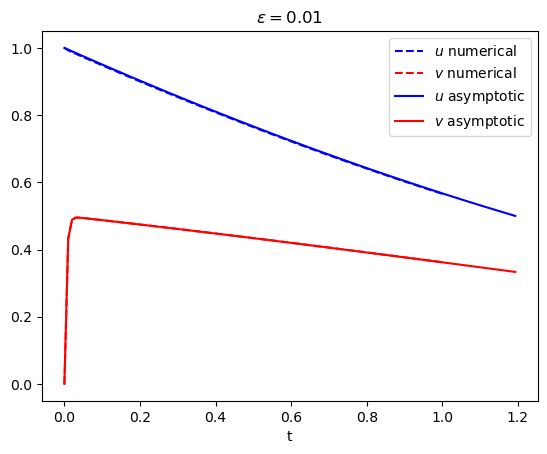

In [4]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

K = 1
lmbda = 1

def mich_ment(w, t, epsilon, K,lmbda): #w = [u,v] 
    u, v = w
    
    dudt = -u+(u+K-lmbda)*v
    dvdt = (u-(u+K)*v)/epsilon
    dwdt = [dudt, dvdt]
    return dwdt

def question1(epsilon):
    w0 = [1,0]
    t = np.linspace(0.0, 1.0, num=100)
    
    u = np.linspace(0.5, 1.0, num=100)
    tau = 1.0 - u - K*np.log(u)
    tau = tau/lmbda
    T = tau/epsilon
    v = u/(u + K) - np.exp(-(1 + K)*T)/(1 + K)
    
    w2 = odeint(mich_ment,w0,t,args=(epsilon,K,lmbda))
    plt.plot(t,w2[:,0],'b--',label=r'$u$ numerical')
    plt.plot(t,w2[:,1],'r--',label=r'$v$ numerical')
    plt.plot(tau,u,'b-',label=r'$u$ asymptotic')
    plt.plot(tau,v,'r-',label=r'$v$ asymptotic')
    
    plt.xlabel('t')
    plt.title('$\epsilon = '+str(epsilon)+'$')
    plt.legend(loc='best')
    plt.show()

question1(0.01)


## 2. Model of Haemoglobin.

Haemoglobin, $Hb$, absorbs oxygen, $O_2$, to form an intermediate complex, $HbO_2$.  The complex then reacts with tissue, $T$, to form a product, $P$, releasing the haemoglobin.  The reactions are written 

\begin{align*}
Hb + O_2 &\underset{k}{\stackrel{k}{\rightleftharpoons}} HbO_2  \\
HbO_2 + T &\xrightarrow{k} Hb + P 
\end{align*}

where the reaction rates are all equal and scaled so that $k = 1$.  

The concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are $e, s, c,$ and $p$, respectively, while the tissue is present in such quantities that its concentration is $1$ for all time. The initial concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are respectively $e_0, s_0, 0$ and $0$.

1. Use the law of mass action to derive a system of ODE’s describing this reaction. Show that
$e(t) + c(t)$ is constant and equal to $e_0$. Use this to reduce the system to a system of two ODE’s
for the equations for $s(t$) and the complex, $c(t) = e_0v(t)$ in the form 

\begin{align*}
\frac{\text{d}s}{\text{d}t} = e_0(v − s(1 − v)), \\
\frac{\text{d}v}{\text{d}t} = s(1 − v) − 2v.
\end{align*}

2. Explain carefully the Michaelis-Menten quasi-steady approximation, and show that it implies that
$s(t)$ is given implicitly by 

\begin{align*}
s + 2 \log s = s_0 + 2 \log s_0 − e_0t .
\end{align*}

3. educe that for large times $s \approx s_0 \exp\big[ \frac{1}{2}(s_0 − e_0t)\big].$
4. Describe how $v$ changes in the very early stages of the reaction. *Hint: Use the fact that initially, $s = s_0$*
\end{enumerate}

## 3. Consider the following symbiotic system 

\begin{align*}
\frac{\text{d}N_1}{\text{d}T} &= r_1N_1 \bigg(1 - \frac{N_1}{K_1} + b_{12}\frac{N_2}{K_1}\bigg), \\
\frac{\text{d}N_2}{\text{d}T} &= r_2N_2 \bigg(1 - \frac{N_2}{K_2} + b_{21}\frac{N_1}{K_2}\bigg),
\end{align*}

where $N_i$ denote the population sizes. The parameters $r_i, K_i, b_{ij}$ are positive constants.

\begin{enumerate}

\item By introducing a suitable non-dimensionalisation show that the system reduces to

\begin{align*}
\frac{\text{d}u_1}{\text{d}t} &= u_1 (1-u_1 + \alpha_{12}u_2) \equiv f(u_1, u_2) \\
\frac{\text{d}u_2}{\text{d}t} &= \rho u_2 (1-u_2+\alpha_{21}u_1) \equiv g(u_1,u_2)
\end{align*}

where $\rho = r_2/r_1,\, \alpha_{12} = b_{12}K_2/K_1,\, \alpha_{21}=b_{21}K_1/K_2$.

\item Find all four steady states and show that three of them are always unstable.
\item Show that unbounded growth can occur when $\alpha_{12}\alpha_{21} > 1$ and a stable mutualistic fixed point
occurs when $\alpha_{12}\alpha_{21} < 1$.
\end{enumerate}

## 4. Consider the general model of the predator prey system

\begin{align*}
\frac{\text{d}N}{\text{d}t} &= \rho N\bigg( 1-\frac{N}{K} \bigg) - \gamma P f(N), \\
\frac{\text{d}P}{\text{d}t} &= P(\sigma f(N) - \eta)
\end{align*}

where $N(t)$ are the number of prey and $P(t)$ the number of predators, which we assume to vary
continuously in time. The parameters $K, \rho, \gamma, \sigma, \eta$ are positive constants. Let

\begin{align*}
f(N) = \frac{N}{N+D}.
\end{align*}

1. What assumptions are made on the per-predator rate of predation, $\gamma f(N)$, when choosing $f(N)$
as above? Hint: Consider the behaviour of $\gamma f(N)$ for large and small values of $N$.

2. Show that non-dimensionalisation of the form $\tau= \rho t$, $u = N/K$, $v = P \gamma/(\rho K)$ produces the
system

\begin{align}
\frac{\text{d}u}{\text{d}\tau} &= u(1-u) - \frac{uv}{u+\delta} \nonumber \\
\frac{\text{d}v}{\text{d}\tau} &= v \bigg( \lambda \frac{u}{u+\delta} - \mu \bigg) 
\label{eq:predprey}
\end{align}

and state the values of the positive parameters $\lambda, \delta, \mu$.


3. Assuming that $u \geq 0$ and $v \geq 0$, show that $(u, v) = (0, 0)$ and $(u, v) = (1, 0)$ are always steady
states of \eqref{eq:predprey}. Show also that if $\lambda > \mu$ and $\lambda > \mu(1 + \delta)$ then there is an additional steady state

\begin{align*}
(u^*, v^*) = \bigg( \frac{\mu \delta}{\lambda - \mu} \,, \frac{\lambda \delta}{(\lambda - \mu)^2} (\lambda - \mu(1+\delta)) \bigg).
\end{align*}


4. Show that if $(u^∗, v^∗)$ is a steady state then the other two fixed points are unstable.


5. Show that at $(u^∗, v^∗)$, the Jacobian matrix of the system is

\begin{align*}
J = \begin{pmatrix}
1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta} & \frac{-u^*}{u^* + \delta}\\
\delta \lambda \frac{(1-u^*)}{u^*+\delta} & 0
\end{pmatrix}
\end{align*}

and that $(u^∗, v^∗)$ is stable if $(1 + \delta)\mu > \lambda(1−\delta)$. 

Hint: When calculating the Jacobian you may find it useful to recall the equation satisfied by $u^∗$ and also write $v^∗$ in terms of $u^∗$.

## 5. Consider the criss-cross venereal infection model for a heterosexual population 

\begin{align*}
\frac{dS}{dt} &= -r SI', \\
\frac{dI}{dt} &= rSI'-aI, \\
\frac{dR}{dt} &= aI, \\
\frac{dS'}{dt} &= -r'S'I,\\
\frac{dI'}{dt} &= r'S'I - a'I',\\
\frac{dR'}{dt} &= a'I',
\end{align*}

where $S$, $I$ and $R$ are, respectively, the susceptibles, infectives and the removed class for the male population, while $S'$, $I'$ and $R'$ are, respectively, the susceptibles, infectives and the removed class for the female population. All parameters are positive constants and the initial values for $S, I, R, S', I',$ and $R'$ are $S_0, I_0, 0, S'_0,I'_0,$ and $0$, respectively.

1. Show that the female and male populations are constant and hence show that $S(t) = S_0 \exp [-r R' / a']$
2. Deduce that $S(\infty)>0$ and $I(\infty) = 0$ with similar results for $S'$ and $I'$. 
3. Show that the threshold condition for an epidemic ($dI/dt > 0, dI'/dt > 0$ at $t = 0$) to occur is at least one of

\begin{align*}
\frac{S_0 I'_0}{I_0} &> \frac{a}{r} \qquad
\frac{S'_0 I_0}{I'_0} > \frac{a'}{r'} 
\end{align*}